In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [22]:
psps = pd.read_csv('../data/processed/processed-shutoffs-weather.csv',
                   dtype=str)
for col in ['deenergize_time', 'restoration_time']:
    psps[col] = pd.to_datetime(psps[col], format='%Y-%m-%d %H:%M:%S')
numeric_cols = [
    'time_out_min', 'hftd_tier', 'total_affected', 'residential_affected',
    'longitude', 'latitude', 'total_population', 'tmin_d-4', 'tmax_d-4',
    'wspd_d-4', 'tmin_d-3', 'tmax_d-3', 'wspd_d-3', 'tmin_d-2', 'tmax_d-2',
    'wspd_d-2', 'tmin_d-1', 'tmax_d-1', 'wspd_d-1', 'tmin_d-0', 'tmax_d-0',
    'wspd_d-0'
]
for col in numeric_cols:
    psps[col] = psps[col].astype(float)

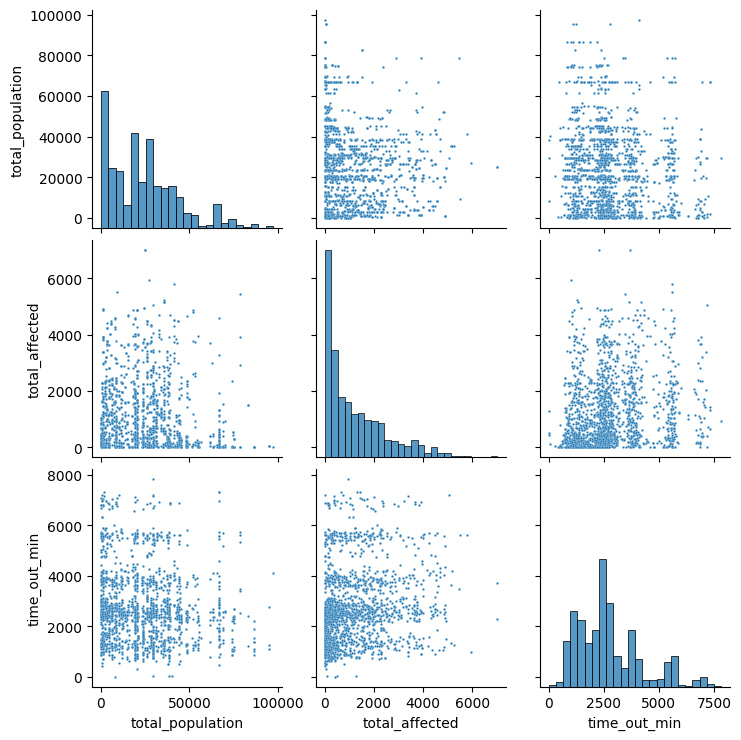

In [32]:
sns.pairplot(
    psps[['total_population', 'total_affected', 'time_out_min']],
    plot_kws={'s': 3}
)
plt.show()

In [40]:
lm = LinearRegression()
X = np.array(psps.total_affected).reshape(-1, 1)
lm.fit(X, psps.time_out_min)
lm.score(X, psps.time_out_min)

0.033558888899753